In [337]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MultiLabelBinarizer

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [338]:
df = pd.read_csv('Movies_final.csv')
df.info()
df.head(87000)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86493 entries, 0 to 86492
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    86493 non-null  int64  
 1   title                 86493 non-null  object 
 2   vote_average          86493 non-null  float64
 3   vote_count            86493 non-null  int64  
 4   status                86493 non-null  object 
 5   release_date          86427 non-null  object 
 6   revenue               86493 non-null  int64  
 7   runtime               86493 non-null  int64  
 8   adult                 86493 non-null  bool   
 9   backdrop_path         70442 non-null  object 
 10  budget                86493 non-null  int64  
 11  homepage              17774 non-null  object 
 12  imdb_id               86467 non-null  object 
 13  original_language     86493 non-null  object 
 14  original_title        86493 non-null  object 
 15  overview           

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords,movieId,Directors,Cast,StarActors
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",79132,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio..."
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,False,/pbrkL804c8yAv3zBZR4QPEafpAR.jpg,165000000,http://www.interstellarmovie.net/,tt0816692,en,Interstellar,The adventures of a group of explorers who mak...,140.241,/gEU2QniE6E77NI6lCU6MxlNBvIx.jpg,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",109487,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...","Matthew McConaughey, Anne Hathaway, Jessica Ch..."
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,False,/nMKdUUepR0i5zn0y1T4CsSB5chy.jpg,185000000,https://www.warnerbros.com/movies/dark-knight/,tt0468569,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,/qJ2tW6WMUDux911r6m7haRef0WH.jpg,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",58559,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","Christian Bale, Heath Ledger, Aaron Eckhart"
3,19995,Avatar,7.573,29815,Released,2009-12-15,2923706026,162,False,/vL5LR6WdxWPjLPFRLe133jXWsh5.jpg,237000000,https://www.avatar.com/movies/avatar,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,/kyeqWdyUXW608qlYkRqosgbbJyK.jpg,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",72998,James Cameron,"Sam Worthington, Zoe Saldaña, Sigourney Weaver...","Sam Worthington, Zoe Saldaña, Sigourney Weaver"
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",89745,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...","Robert Downey Jr., Chris Evans"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86488,806914,Avicenna,0.000,0,Released,1957-12-09,0,92,False,NaN,0,NaN,tt0312400,ru,Авиценна,"The film is dedicated to the philosopher, doct...",0.647,/kGe8cpnOgkiIfQWFezgED9aRfH0.jpg,"Biography, Drama, History","Drama, History",Tashkent Studios,Soviet Union,Russian,"biography, historical drama, avitsenna",286353,Kamil Yarmatov,"Marat Aripov, Tulkun Tadzhiyev, Abbas Bakirov,...","Marat Aripov, Tulkun Tadzhiyev, Abbas Bakirov"
86489,273772,Black Nation,0.000,0,Released,

In [339]:
def count_zeros_and_empty(df):
    count_dict = {}

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            zero_count = (df[col] == 0).sum()
            count_dict[col] = {'zeros': zero_count}

        elif pd.api.types.is_string_dtype(df[col]):
            empty_count = (df[col] == '').sum()
            count_dict[col] = {'empty_strings': empty_count}

    return count_dict

count_result = count_zeros_and_empty(df)
print(count_result)


{'id': {'zeros': 0}, 'title': {'empty_strings': 0}, 'vote_average': {'zeros': 2576}, 'vote_count': {'zeros': 2566}, 'status': {'empty_strings': 0}, 'revenue': {'zeros': 73454}, 'runtime': {'zeros': 1262}, 'adult': {'zeros': 86474}, 'budget': {'zeros': 71884}, 'original_language': {'empty_strings': 0}, 'original_title': {'empty_strings': 0}, 'popularity': {'zeros': 0}, 'movieId': {'zeros': 0}}


# Początkowe usunięcie niepotrzebnych kolumn

In [340]:
df = df.drop(columns=['adult', 'homepage', 'backdrop_path', 'imdb_id', 'poster_path', 'id'])
df = df[df['status'] == 'Released']
df = df.drop(columns=['status'])
df = df.reset_index(drop=True)

In [341]:
print(df.info())

df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86477 entries, 0 to 86476
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   title                 86477 non-null  object 
 1   vote_average          86477 non-null  float64
 2   vote_count            86477 non-null  int64  
 3   release_date          86416 non-null  object 
 4   revenue               86477 non-null  int64  
 5   runtime               86477 non-null  int64  
 6   budget                86477 non-null  int64  
 7   original_language     86477 non-null  object 
 8   original_title        86477 non-null  object 
 9   overview              85652 non-null  object 
 10  popularity            86477 non-null  float64
 11  tagline               39728 non-null  object 
 12  genres                84906 non-null  object 
 13  production_companies  72717 non-null  object 
 14  production_countries  79781 non-null  object 
 15  spoken_languages   

,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords,movieId,Directors,Cast,StarActors
0,Inception,8.364,34495,2010-07-15,825532764,148,160000000,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",79132,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio..."
1,Interstellar,8.417,32571,2014-11-05,701729206,169,165000000,en,Interstellar,The adventures of a group of explorers who mak...,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",109487,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...","Matthew McConaughey, Anne Hathaway, Jessica Ch..."
2,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,185000000,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",58559,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...","Christian Bale, Heath Ledger, Aaron Eckhart"


# Inzynieria cech

In [342]:
# IMDB WEIGHTED AVERAGE

C = df['vote_average'].mean()
m = 304 # TOP 10 %
# m = 99 # TOP 20 %

def weighted_rating(row, m=m, C=C):
    v = row['vote_count']
    R = row['vote_average']
    return (R * v + C * m) / (v + m) if v > 0 else 0

df['vote_score'] = df.apply(weighted_rating, axis=1)

In [343]:
# BLOCKBUSTER

budget_threshold = df['revenue'].quantile(0.95)
popularity_threshold = df['popularity'].quantile(0.90)
vote_score_threshold = df['vote_score'].quantile(0.90)

df['if_blockbuster'] = np.where(
    (df['vote_score'] >= vote_score_threshold) &
    (df['revenue'] >= budget_threshold) &
    (df['popularity'] >= popularity_threshold),
    1,
    0
)

print(df[['title', 'revenue', 'popularity', 'vote_score', 'if_blockbuster']].head())


             title     revenue  popularity  vote_score  if_blockbuster
0        Inception   825532764      83.952    8.341950               1
1     Interstellar   701729206     140.241    8.393170               1
2  The Dark Knight  1004558444     130.643    8.485731               1
3           Avatar  2923706026      79.932    7.555508               1
4     The Avengers  1518815515      98.082    7.690709               1


In [344]:
# HIGHLY WATCHED

df['highly_watched'] = np.where(
    ((df['popularity'] >= popularity_threshold) & (df['vote_count'] >= df['vote_count'].quantile(0.80))),
    1,
    0
)

print(df[['title', 'budget', 'popularity', 'vote_count', 'vote_score', 'if_blockbuster', 'highly_watched']].head())

             title     budget  popularity  vote_count  vote_score  \
0        Inception  160000000      83.952       34495    8.341950   
1     Interstellar  165000000     140.241       32571    8.393170   
2  The Dark Knight  185000000     130.643       30619    8.485731   
3           Avatar  237000000      79.932       29815    7.555508   
4     The Avengers  220000000      98.082       29166    7.690709   

   if_blockbuster  highly_watched  
0               1               1  
1               1               1  
2               1               1  
3               1               1  
4               1               1  


In [345]:
# YEAR AND DECADES

df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year

# BECAUSE WE HAVE 9 MOVIES <1890 WE CHANGE THEIR YEAR TO 1890
df.loc[df['release_year'] < 1890, 'release_year'] = 1890
df['decade'] = pd.cut(df['release_year'], bins=range(1890, 2031, 10), right=False)

In [346]:
# HIGHLY RATED WITH DIVISION ON DECADES

vote_score_thresholds = df.groupby('decade')['vote_score'].quantile(0.90)

def is_highly_rated(row):
    decade = row['decade']
    score = row['vote_score']
    count = row['vote_count']

    if pd.isna(decade) or pd.isna(score) or pd.isna(count):
        return 0

    threshold = vote_score_thresholds.get(decade, np.inf)

    # To block low_voted movies
    if count >= 50 and score >= threshold:
        return 1
    return 0

df['highly_rated'] = df.apply(is_highly_rated, axis=1)

/var/folders/49/03nwkv1x7sxcmbpvblw1gf4r0000gn/T/ipykernel_1028/2878591845.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  vote_score_thresholds = df.groupby('decade')['vote_score'].quantile(0.90)


In [347]:
# COMBINING VOTE_SCORE AND POPULARITY
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['scaled_votes', 'scaled_popularity']] = scaler.fit_transform(df[['vote_count', 'popularity']])

df['engagement_score'] = 0.6 * df['scaled_votes'] + 0.4 * df['scaled_popularity']

In [348]:
# WE GET ENGLISH STOPWORDS
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mateuszmiszkurka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [349]:
# SEMANTIC_KEYWORDS (MERGE OF TAGLINE + KEYWORDS)

import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_and_tokenize_tagline(tagline):
    if pd.isna(tagline):
        return []
    words = re.sub(r'[^\w\s]', '', tagline.lower()).split()
    filtered = [w for w in words if w not in stop_words]
    return filtered

def combine_keywords_and_tagline(row):
    kw = row['keywords'] if pd.notna(row['keywords']) else ''
    tag_tokens = clean_and_tokenize_tagline(row['tagline'])
    kw_tokens = [k.strip().lower() for k in kw.split(',') if k]
    combined = kw_tokens + tag_tokens
    return list(set(combined))

df['semantic_keywords'] = df.apply(combine_keywords_and_tagline, axis=1)

In [350]:
# CAST IMPORTANCE AND TOP ACTORS

from collections import defaultdict

df['Cast'] = df['Cast'].fillna("").apply(lambda x: x.split(', ') if isinstance(x, str) else [])
df['Cast'] = df['Cast'].apply(lambda x: [] if x == [''] else x)

actor_engagement = defaultdict(list)

for _, row in df.iterrows():
    cast = row['Cast']
    engagement = row.get('engagement_score', np.nan)
    if not isinstance(cast, list) or pd.isna(engagement):
        continue
    for actor in cast:
        actor_engagement[actor].append(engagement)

actor_score = {
    actor: np.mean(scores) * np.log1p(len(scores))
    for actor, scores in actor_engagement.items()
}

# TO DEFINE PARAMETERS (SEEMS TO HAVE BEST RESULTS WITH 5)
TOP_N = 5
MAX_CAST_LEN = df['Cast'].apply(len).max()

def compute_cast_importance_with_names(cast):
    if not cast or len(cast) == 0:
        return pd.Series([0.0, []])
    scores = sorted([(actor, actor_score.get(actor, 0)) for actor in cast], key=lambda x: x[1], reverse=True)
    top_scores = scores[:TOP_N]
    mean_score = np.mean([s[1] for s in top_scores]) if top_scores else 0.0
    weight = len(top_scores) / MAX_CAST_LEN if MAX_CAST_LEN > 0 else 1.0
    importance = mean_score * weight
    top_actors = [s[0] for s in top_scores]
    return pd.Series([importance, top_actors])

df[['cast_importance', 'top_cast_members']] = df['Cast'].apply(compute_cast_importance_with_names)

In [351]:
df.tail(1000)

,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords,movieId,Directors,Cast,StarActors,vote_score,if_blockbuster,highly_watched,release_year,decade,highly_rated,scaled_votes,scaled_popularity,engagement_score,semantic_keywords,cast_importance,top_cast_members
85477,Zuckerkandl!,0.0,0,1968-01-01,0,15,0,en,Zuckerkandl!,"Animated cartoon, in which philosopher and sch...",0.915,NaN,"Animation, Comedy",NaN,United States of America,English,NaN,271957,John Hubley,[Phil Leida],Phil Leida,0.0,0,0,1968.0,"[1960, 1970)",0,0.0,0.000105,0.000042,[],0.000003,[Phil Leida]
85478,Maschenka,0.0,0,1987-03-05,0,103,0,en,Maschenka,Film adaptation of Vladimir Nabokov's debut no...,1.237,NaN,"Drama, Romance","ZDF, Jörn Donner Productions, France 3 Cinéma,...","Finland, France, Germany, United Kingdom",English,NaN,241058,John Goldschmidt,"[Irina Brook, Cary Elwes, Sunnyi Melles, Jonat...","Irina Brook, Cary Elwes, Sunnyi Melles",0.0,0,0,1987.0,"[1980, 1990)",0,0.0,0.000213,0.000085,[],0.016491,"[Cary Elwes, Michael Gough, Freddie Jones, Ver..."
85479,The Next Industrial Revolution,0.0,0,2002-01-31,0,0,0,pt,The Next Industrial Revolution,NaN,0.600,NaN,Documentary,Earthome Productions,NaN,English,NaN,158011,"Christopher Bedford, Shelley Morhaim",[Susan Sarandon],Susan Sarandon,0.0,0,0,2002.0,"[2000, 2010)",0,0.0,0.000000,0.000000,[],0.006717,[Susan Sarandon]
85480,Britain's Nuclear Secrets: Inside Sellafield,0.0,0,2015-11-04,0,59,0,en,Britain's Nuclear Secrets: Inside Sellafield,Lying on the remote north west coast of Englan...,0.600,NaN,Documentary,BBC,NaN,English,NaN,213858,NaN,[],NaN,0.0,0,0,2015.0,"[2010, 2020)",0,0.0,0.000000,0.000000,[],0.000000,[]
85481,The Doctor From India,0.0,0,2018-02-02,0,89,0,en,The Doctor From India,An Indian doctor introduces the West to an anc...,0.600,NaN,Documentary,NaN,United States of America,NaN,ayurveda,189345,NaN,[],NaN,0.0,0,0,2018.0,"[2010, 2020)",0,0.0,0.000000,0.000000,[ayurveda],0.000000,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86472,Avicenna,0.0,0,1957-12-09,0,92,0,ru,Авиценна,"The film is dedicated to the philosopher, doct...",0.647,"Biography, Drama, History","Drama, History",Tashkent Studios,Soviet Union,Russian,"biography, historical drama, avitsenna",286353,Kamil Yarmatov,"[Marat Aripov, Tulkun Tadzhiyev, Abbas Bakirov...","Marat Aripov, Tulkun Tadzhiyev, Abbas Bakirov",0.0,0,0,1957.0,"[1950, 1960)",0,0.0,0.000016,0.000006,"[avitsenna, drama, biography, historical drama...",0.000029,"[Rakhim Pirmukhamedov, Khikmat Latypov, Razzak..."
86473,Black Nation,0.0,0,2008-01-01,0,62,0,en,Black Nation,Black Nation is a compelling film that takes a...,0.600,NaN,Documentary,XiveTV,United States of America,English,NaN,272047,NaN,[],NaN,0.0,0,0,2008.0,"[2000, 2010)",0,0.0,0.000000,0.000000,[],0.000000,[]
86474,Blind Man,0.0,0,2007-01-01,0,0,0,en,Blind Man,Kevin and Derek hit the road from Chicago to s...,0.600,NaN,NaN,NaN,NaN,NaN,NaN,138734,Tim Harrison,"[Brian McGuire, Bret Roberts, Nick Mystrom, Ka...","Brian McGuire, Bret Roberts, Nick Mystrom",0.0,0,0,2007.0,"[2000, 2010)",0,0.0,0.000000,0.000000,[],0.000445,"[Bret Roberts, Brian McGuire, Nick Mystrom, Ka..."
86475,121: Overcoming Drug Addiction by Faith,0.0,0,2021-03-05,0,80,0,en,121: Overcoming Drug Addiction by Faith,"At the age of 20, Burton Barr Jr. was held dow...",0.600,NaN,Documentary,NaN,NaN,NaN,NaN,246366,NaN,[],NaN,0.0,0,0,2021.0,"[2020, 2030)",0,0.0,0.000000,0.000000,[],0.000000,[]


In [352]:
# DIRECTORS SCORE AND BEST DIRECTORS

df['Directors'] = df['Directors'].fillna("").apply(lambda x: x.split(', ') if isinstance(x, str) else [])
df['Directors'] = df['Directors'].apply(lambda x: [] if x == [''] else x)

director_engagement_sum = defaultdict(float)
director_film_count = defaultdict(int)

for idx, row in df.iterrows():
    engagement = row['engagement_score']
    for director in row['Directors']:
        director_engagement_sum[director] += engagement
        director_film_count[director] += 1

director_score = {
    director: total_engagement / np.log1p(director_film_count[director])
    for director, total_engagement in director_engagement_sum.items()
}

# TO DEFINE PARAMETERS (SEEMS TO HAVE BEST RESULTS WITH 3)
TOP_N_DIRECTORS = 3

def compute_director_importance_with_names(directors):
    if not directors or len(directors) == 0:
        return pd.Series([0.0, []])
    scores = sorted([(d, director_score.get(d, 0)) for d in directors], key=lambda x: x[1], reverse=True)
    top_scores = scores[:TOP_N_DIRECTORS]
    mean_score = np.mean([s[1] for s in top_scores]) if top_scores else 0.0
    return pd.Series([mean_score, [s[0] for s in top_scores]])

df[['director_score', 'top_directors']] = df['Directors'].apply(compute_director_importance_with_names)

In [353]:
df.head(1000)

,title,vote_average,vote_count,release_date,revenue,runtime,budget,original_language,original_title,overview,popularity,tagline,genres,production_companies,production_countries,spoken_languages,keywords,movieId,Directors,Cast,StarActors,vote_score,if_blockbuster,highly_watched,release_year,decade,highly_rated,scaled_votes,scaled_popularity,engagement_score,semantic_keywords,cast_importance,top_cast_members,director_score,top_directors
0,Inception,8.364,34495,2010-07-15,825532764,148,160000000,en,Inception,"Cobb, a skilled thief who commits corporate es...",83.952,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, franc...",79132,[Christopher Nolan],"[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...","Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",8.341950,1,1,2010.0,"[2010, 2020)",1,1.000000,0.027842,0.611137,"[los angeles, rescue, kidnapping, spy, airplan...",0.158334,"[Leonardo DiCaprio, Tom Hardy, Cillian Murphy,...",1.380847,[Christopher Nolan]
1,Interstellar,8.417,32571,2014-11-05,701729206,169,165000000,en,Interstellar,The adventures of a group of explorers who mak...,140.241,Mankind was born on Earth. It was never meant ...,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,"rescue, future, spacecraft, race against time,...",109487,[Christopher Nolan],"[Matthew McConaughey, Anne Hathaway, Jessica C...","Matthew McConaughey, Anne Hathaway, Jessica Ch...",8.393170,1,1,2014.0,"[2010, 2020)",1,0.944224,0.046644,0.585192,"[space, time manipulation, dystopia, single fa...",0.121852,"[Anne Hathaway, Timothée Chalamet, Jessica Cha...",1.380847,[Christopher Nolan]
2,The Dark Knight,8.512,30619,2008-07-16,1004558444,152,185000000,en,The Dark Knight,Batman raises the stakes in his war on crime. ...,130.643,Welcome to a world without rules.,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin","joker, sadism, chaos, secret identity, crime f...",58559,[Christopher Nolan],"[Christian Bale, Heath Ledger, Aaron Eckhart, ...","Christian Bale, Heath Ledger, Aaron Eckhart",8.485731,1,1,2008.0,"[2000, 2010)",1,0.887636,0.043438,0.549957,"[welcome, vigilante, without, anti villain, cr...",0.122563,"[Cillian Murphy, Christian Bale, Morgan Freema...",1.380847,[Christopher Nolan]
3,Avatar,7.573,29815,2009-12-15,2923706026,162,237000000,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",79.932,Enter the world of Pandora.,"Action, Adventure, Fantasy, Science Fiction","Dune Entertainment, Lightstorm Entertainment, ...","United States of America, United Kingdom","English, Spanish","future, society, culture clash, space travel, ...",72998,[James Cameron],"[Sam Worthington, Zoe Saldaña, Sigourney Weave...","Sam Worthington, Zoe Saldaña, Sigourney Weaver",7.555508,1,1,2009.0,"[2000, 2010)",1,0.864328,0.026499,0.529197,"[space, power relations, anti war, space trave...",0.108494,"[Zoe Saldaña, Michelle Rodriguez, Sigourney We...",0.777054,[James Cameron]
4,The Avengers,7.710,29166,2012-04-25,1518815515,143,220000000,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com...",89745,[Joss Whedon],"[Robert Downey Jr., Chris Evans, Scarlett Joha...","Robert Downey Jr., Chris Evans",7.690709,1,1,2012.0,"[2010, 2020)",1,0.845514,0.032562,0.520333,"[superhero team, alien invasion, aftercreditss...",0.215675,"[Chris Hemsworth, Chris Evans, Scarlett Johans...",0.606115,[Joss Whedon]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [354]:
# Lista kolumn do usunięcia
columns_to_drop = [
    'revenue',
    'budget',
    'vote_count',
    'vote_average',
    'production_companies',
    'production_countries',
    'original_language',
    'scaled_votes',
    'scaled_popularity',
    'StarActors',
    'spoken_languages',
    'original_title',
    'release_date',
    'overview',
    'tagline',
    'Cast',
    'vote_score',
    'keywords',
    'popularity',
    'Directors'
]

df_cleaned = df.drop(columns=columns_to_drop)
df = df_cleaned

print(df_cleaned.info())

count_result = count_zeros_and_empty(df)
print(count_result)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86477 entries, 0 to 86476
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   title              86477 non-null  object  
 1   runtime            86477 non-null  int64   
 2   genres             84906 non-null  object  
 3   movieId            86477 non-null  int64   
 4   if_blockbuster     86477 non-null  int64   
 5   highly_watched     86477 non-null  int64   
 6   release_year       86416 non-null  float64 
 7   decade             86416 non-null  category
 8   highly_rated       86477 non-null  int64   
 9   engagement_score   86477 non-null  float64 
 10  semantic_keywords  86477 non-null  object  
 11  cast_importance    86477 non-null  float64 
 12  top_cast_members   86477 non-null  object  
 13  director_score     86477 non-null  float64 
 14  top_directors      86477 non-null  object  
dtypes: category(1), float64(4), int64(5), object(5)
memor

In [355]:
df.head(87000)

,title,runtime,genres,movieId,if_blockbuster,highly_watched,release_year,decade,highly_rated,engagement_score,semantic_keywords,cast_importance,top_cast_members,director_score,top_directors
0,Inception,148,"Action, Science Fiction, Adventure",79132,1,1,2010.0,"[2010, 2020)",1,0.611137,"[los angeles, rescue, kidnapping, spy, airplan...",0.158334,"[Leonardo DiCaprio, Tom Hardy, Cillian Murphy,...",1.380847,[Christopher Nolan]
1,Interstellar,169,"Adventure, Drama, Science Fiction",109487,1,1,2014.0,"[2010, 2020)",1,0.585192,"[space, time manipulation, dystopia, single fa...",0.121852,"[Anne Hathaway, Timothée Chalamet, Jessica Cha...",1.380847,[Christopher Nolan]
2,The Dark Knight,152,"Drama, Action, Crime, Thriller",58559,1,1,2008.0,"[2000, 2010)",1,0.549957,"[welcome, vigilante, without, anti villain, cr...",0.122563,"[Cillian Murphy, Christian Bale, Morgan Freema...",1.380847,[Christopher Nolan]
3,Avatar,162,"Action, Adventure, Fantasy, Science Fiction",72998,1,1,2009.0,"[2000, 2010)",1,0.529197,"[space, power relations, anti war, space trave...",0.108494,"[Zoe Saldaña, Michelle Rodriguez, Sigourney We...",0.777054,[James Cameron]
4,The Avengers,143,"Science Fiction, Action, Adventure",89745,1,1,2012.0,"[2010, 2020)",1,0.520333,"[superhero team, alien invasion, aftercreditss...",0.215675,"[Chris Hemsworth, Chris Evans, Scarlett Johans...",0.606115,[Joss Whedon]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86472,Avicenna,92,"Drama, History",286353,0,0,1957.0,"[1950, 1960)",0,0.000006,"[avitsenna, drama, biography, historical drama...",0.000029,"[Rakhim Pirmukhamedov, Khikmat Latypov, Razzak...",0.000009,[Kamil Yarmatov]
86473,Black Nation,62,Documentary,272047,0,0,2008.0,"[2000, 2010)",0,0.000000,[],0.000000,[],0.000000,[]
86474,Blind Man,0,NaN,138734,0,0,2007.0,"[2000, 2010)",0,0.000000,[],0.000445,"[Bret Roberts, Brian McGuire, Nick Mystrom, Ka...",0.000000,[Tim Harrison]
86475,121: Overcoming Drug Addiction by Faith,80,Documentary,246366,0,0,2021.0,"[2020, 2030)",0,0.000000,[],0.000000,[],0.000000,[]


# Lematyzacja i czyszczenie danych opisowych

In [356]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mateuszmiszkurka/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/mateuszmiszkurka/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [357]:
# LEMANIZER IN ORDER TO ACHIVE SIMILARITIES AS ONE WORDS (books != book) => (book = book)

import ast

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def lemmatize_keywords_phrases(keywords):
    if isinstance(keywords, str):
        try:
            keywords = ast.literal_eval(keywords)
        except:
            return []
    if not isinstance(keywords, list):
        return []

    result = []
    for phrase in keywords:
        phrase = phrase.lower()
        if phrase in stop_words:
            continue
        lemmatized = " ".join([
            lemmatizer.lemmatize(word)
            for word in phrase.split()
            if word not in stop_words
        ])
        if lemmatized:
            result.append(lemmatized)
    return result

df["lemmatized_keywords"] = df["semantic_keywords"].apply(lemmatize_keywords_phrases)

print(df[["semantic_keywords", "lemmatized_keywords"]].head(10))

                                   semantic_keywords  \
0  [los angeles, rescue, kidnapping, spy, airplan...   
1  [space, time manipulation, dystopia, single fa...   
2  [welcome, vigilante, without, anti villain, cr...   
3  [space, power relations, anti war, space trave...   
4  [superhero team, alien invasion, aftercreditss...   
5  [happy, ending, anti hero, aftercreditsstinger...   
6  [sacrifice, space, aftercreditsstinger, marvel...   
7  [rage and hate, based on novel or book, suppor...   
8  [start, space, adventurer, aftercreditsstinger...   
9  [nonlinear timeline, redemption, los angeles, ...   

                                 lemmatized_keywords  
0  [los angeles, rescue, kidnapping, spy, airplan...  
1  [space, time manipulation, dystopia, single fa...  
2  [welcome, vigilante, without, anti villain, cr...  
3  [space, power relation, anti war, space travel...  
4  [superhero team, alien invasion, aftercreditss...  
5  [happy, ending, anti hero, aftercreditsstinger... 

In [358]:
print("Przed:", df['semantic_keywords'].iloc[0])
print("Po lematyzacji:", df['lemmatized_keywords'].iloc[0])

Przed: ['los angeles', 'rescue', 'kidnapping', 'spy', 'airplane', 'dream world', 'virtual reality', 'subconscious', 'france', 'california', 'philosophy', 'heist', 'manipulation', 'mind', 'allegory', 'mission', 'dream', 'architecture', 'car crash', 'crime', 'paris', 'scene', 'memory']
Po lematyzacji: ['los angeles', 'rescue', 'kidnapping', 'spy', 'airplane', 'dream world', 'virtual reality', 'subconscious', 'france', 'california', 'philosophy', 'heist', 'manipulation', 'mind', 'allegory', 'mission', 'dream', 'architecture', 'car crash', 'crime', 'paris', 'scene', 'memory']


In [359]:
import string

def clean_title(title):
    title = ''.join([char for char in title if char not in string.punctuation])

    title_tokens = title.lower().split()
    title_tokens = [word for word in title_tokens if word not in stop_words]
    title_tokens = list(set(title_tokens))

    return title_tokens

df['cleaned_title'] = df['title'].apply(clean_title)

In [360]:
for idx, row in df.head(10).iterrows():
    print(f"Tytul: {row['title']} | Cleaned Title: {row['cleaned_title']}")

Tytul: Inception | Cleaned Title: ['inception']
Tytul: Interstellar | Cleaned Title: ['interstellar']
Tytul: The Dark Knight | Cleaned Title: ['knight', 'dark']
Tytul: Avatar | Cleaned Title: ['avatar']
Tytul: The Avengers | Cleaned Title: ['avengers']
Tytul: Deadpool | Cleaned Title: ['deadpool']
Tytul: Avengers: Infinity War | Cleaned Title: ['infinity', 'avengers', 'war']
Tytul: Fight Club | Cleaned Title: ['club', 'fight']
Tytul: Guardians of the Galaxy | Cleaned Title: ['guardians', 'galaxy']
Tytul: Pulp Fiction | Cleaned Title: ['pulp', 'fiction']


# Uzupełnienie pozostalych braków

In [361]:
# FOR NUMERICAL VALUES WE TAKE MEDIAN FOR (runtime) AND (release_year)

median_runtime = df[df['runtime'] > 0]['runtime'].median()
df['runtime'] = df['runtime'].replace(0, median_runtime)

median_release_year = df['release_year'].dropna().median()
df['release_year'] = df['release_year'].fillna(median_release_year)
df['release_year'] = df['release_year'].replace(0, median_release_year)

df = df.reset_index(drop=True)

In [362]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86477 entries, 0 to 86476
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   title                86477 non-null  object  
 1   runtime              86477 non-null  int64   
 2   genres               84906 non-null  object  
 3   movieId              86477 non-null  int64   
 4   if_blockbuster       86477 non-null  int64   
 5   highly_watched       86477 non-null  int64   
 6   release_year         86477 non-null  float64 
 7   decade               86416 non-null  category
 8   highly_rated         86477 non-null  int64   
 9   engagement_score     86477 non-null  float64 
 10  semantic_keywords    86477 non-null  object  
 11  cast_importance      86477 non-null  float64 
 12  top_cast_members     86477 non-null  object  
 13  director_score       86477 non-null  float64 
 14  top_directors        86477 non-null  object  
 15  lemmatized_keywords

# Usunięcie nieczęstych wartości z kolumn których wartości są listami

In [363]:
def remove_uncommon_values(df, column_name, min_count=5):
    df[column_name] = df[column_name].fillna('').apply(
        lambda x: eval(x) if isinstance(x, str) and x.startswith("[") else (
            [] if x == '' else x if isinstance(x, list) else [x]
        )
    )

    listOfValues = df[column_name].explode()
    print(f"Distinct values for column {column_name} before: {listOfValues.nunique()}")

    counts = listOfValues.value_counts()
    allowed_values = set(counts[counts > min_count].index)

    df[column_name] = df[column_name].apply(
        lambda kw_list: [kw for kw in kw_list if kw in allowed_values]
        if isinstance(kw_list, list) else []
    )

    print(f"Distinct values for column {column_name} after: {df[column_name].explode().nunique()}")
    return df

df = remove_uncommon_values(df, 'semantic_keywords', 5)
df = remove_uncommon_values(df, 'lemmatized_keywords', 5)
df = remove_uncommon_values(df, 'top_directors', 2)
df = remove_uncommon_values(df, 'top_cast_members', 3)

Distinct values for column semantic_keywords before: 44486
Distinct values for column semantic_keywords after: 11295
Distinct values for column lemmatized_keywords before: 41521
Distinct values for column lemmatized_keywords after: 10828
Distinct values for column top_directors before: 33445
Distinct values for column top_directors after: 7800
Distinct values for column top_cast_members before: 111421
Distinct values for column top_cast_members after: 22404


In [364]:
print("Puste semantic_keywords:", (df['semantic_keywords'].apply(len) == 0).sum())
print("Puste lemmatized_keywords:", (df['lemmatized_keywords'].apply(len) == 0).sum())
print("Puste top_directors:", (df['top_directors'].apply(len) == 0).sum())

Puste semantic_keywords: 20014
Puste lemmatized_keywords: 19987
Puste top_directors: 34858


In [365]:
df.info()
df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86477 entries, 0 to 86476
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   title                86477 non-null  object  
 1   runtime              86477 non-null  int64   
 2   genres               84906 non-null  object  
 3   movieId              86477 non-null  int64   
 4   if_blockbuster       86477 non-null  int64   
 5   highly_watched       86477 non-null  int64   
 6   release_year         86477 non-null  float64 
 7   decade               86416 non-null  category
 8   highly_rated         86477 non-null  int64   
 9   engagement_score     86477 non-null  float64 
 10  semantic_keywords    86477 non-null  object  
 11  cast_importance      86477 non-null  float64 
 12  top_cast_members     86477 non-null  object  
 13  director_score       86477 non-null  float64 
 14  top_directors        86477 non-null  object  
 15  lemmatized_keywords

,title,runtime,genres,movieId,if_blockbuster,highly_watched,release_year,decade,highly_rated,engagement_score,semantic_keywords,cast_importance,top_cast_members,director_score,top_directors,lemmatized_keywords,cleaned_title
0,Inception,148,"Action, Science Fiction, Adventure",79132,1,1,2010.0,"[2010, 2020)",1,0.611137,"[los angeles, rescue, kidnapping, spy, airplan...",0.158334,"[Leonardo DiCaprio, Tom Hardy, Cillian Murphy,...",1.380847,[Christopher Nolan],"[los angeles, rescue, kidnapping, spy, airplan...",[inception]
1,Interstellar,169,"Adventure, Drama, Science Fiction",109487,1,1,2014.0,"[2010, 2020)",1,0.585192,"[space, dystopia, single father, space travel,...",0.121852,"[Anne Hathaway, Timothée Chalamet, Jessica Cha...",1.380847,[Christopher Nolan],"[space, dystopia, single father, space travel,...",[interstellar]
2,The Dark Knight,152,"Drama, Action, Crime, Thriller",58559,1,1,2008.0,"[2000, 2010)",1,0.549957,"[welcome, vigilante, without, criminal masterm...",0.122563,"[Cillian Murphy, Christian Bale, Morgan Freema...",1.380847,[Christopher Nolan],"[welcome, vigilante, without, criminal masterm...","[knight, dark]"
3,Avatar,162,"Action, Adventure, Fantasy, Science Fiction",72998,1,1,2009.0,"[2000, 2010)",1,0.529197,"[space, power relations, anti war, space trave...",0.108494,"[Zoe Saldaña, Michelle Rodriguez, Sigourney We...",0.777054,[James Cameron],"[space, power relation, anti war, space travel...",[avatar]
4,The Avengers,143,"Science Fiction, Action, Adventure",89745,1,1,2012.0,"[2010, 2020)",1,0.520333,"[superhero team, alien invasion, aftercreditss...",0.215675,"[Chris Hemsworth, Chris Evans, Scarlett Johans...",0.606115,[Joss Whedon],"[superhero team, alien invasion, aftercreditss...",[avengers]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,The Empire Strikes Back,124,"Adventure, Action, Science Fiction",1196,1,1,1980.0,"[1980, 1990)",1,0.278984,"[rebellion, space battle, space colony, androi...",0.127542,"[Peter Mayhew, Anthony Daniels, Harrison Ford,...",0.126274,[Irvin Kershner],"[rebellion, space battle, space colony, androi...","[back, strikes, empire]"
96,Shrek,90,"Animation, Comedy, Fantasy, Adventure, Family",4306,1,1,2001.0,"[2000, 2010)",1,0.286754,"[fairy tale, tale, ogre, enchantment, woman di...",0.091238,"[Cameron Diaz, Mike Myers, Eddie Murphy]",0.317969,"[Andrew Adamson, Vicky Jenson]","[fairy tale, tale, ogre, enchantment, woman di...",[shrek]
97,Ratatouille,111,"Animation, Comedy, Family, Fantasy",50872,1,1,2007.0,"[2000, 2010)",1,0.284511,"[expensive restaurant, food, sibling relations...",0.083272,"[Peter Sohn, Will Arnett, Brad Garrett]",0.441754,[Brad Bird],"[expensive restaurant, food, sibling relations...",[ratatouille]
98,Kingsman: The Secret Service,129,"Crime, Comedy, Action, Adventure",119145,1,1,2014.0,"[2010, 2020)",1,0.279897,"[secret agent, man, manners, duringcreditsstin...",0.108122,"[Samuel L. Jackson, Taron Egerton, Jack Davenp...",0.498425,[Matthew Vaughn],"[secret agent, man, manner, duringcreditssting...","[secret, service, kingsman]"


# Sprawdzenie numerycznych wartości odstających

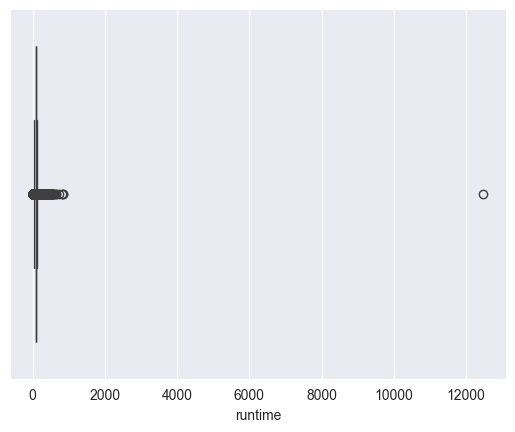

Found 146 outliers out of 86477 rows for column runtime
runtime
360    8
260    6
540    6
270    6
300    4
      ..
497    1
410    1
455    1
418    1
373    1
Name: count, Length: 91, dtype: int64


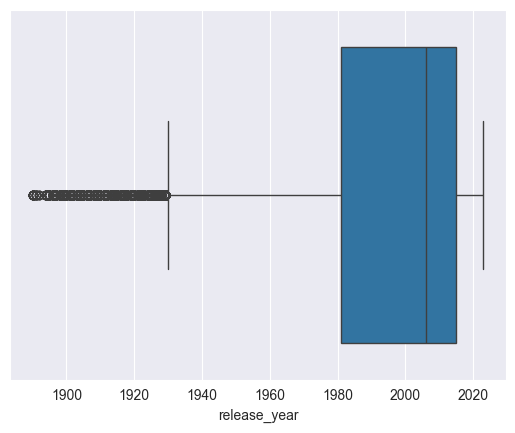

Found 807 outliers out of 86477 rows for column release_year
release_year
1914.0    57
1896.0    57
1900.0    55
1916.0    48
1913.0    43
1915.0    42
1901.0    41
1897.0    38
1912.0    38
1907.0    35
1917.0    34
1903.0    34
1899.0    31
1906.0    27
1894.0    27
1908.0    26
1909.0    23
1902.0    20
1911.0    20
1910.0    19
1905.0    19
1898.0    17
1895.0    17
1904.0    16
1890.0    14
1891.0     6
1892.0     3
Name: count, dtype: int64


In [366]:
import seaborn as sns
import matplotlib.pyplot as plt

def find_outliers_zscore(df, column_name, threshold=3):
    mean = df[column_name].mean()
    std = df[column_name].std()

    z_scores = (df[column_name] - mean) / std

    outliers_z = df[np.abs(z_scores) > threshold]

    sns.boxplot(x=df[column_name])
    plt.show()

    print(f"Found {len(outliers_z)} outliers out of {df.shape[0]} rows for column {column_name}")
    print(outliers_z[column_name].value_counts())

    return outliers_z

# WE DO NOT ADD 'engagement_score', 'cast_importance', 'director_score' AS THIS WILL AFFECT OUTPUT A LOT
for col in ['runtime','release_year']:
    outliers_z = find_outliers_zscore(df, col)

# Zastąpienie wartości odstających

In [367]:
def cap_outliers_zscore(df, column_name, threshold=4):
    mean = df[column_name].mean()
    std = df[column_name].std()

    z_scores = (df[column_name] - mean) / std

    df[column_name] = np.where(np.abs(z_scores) > threshold, mean, df[column_name])

    return df

for col in ['runtime','release_year']:
    df = cap_outliers_zscore(df, col)
    print(f'Z-score: Capped outliers for {col}')

Z-score: Capped outliers for runtime
Z-score: Capped outliers for release_year


In [368]:
df.info()

df.head(100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86477 entries, 0 to 86476
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   title                86477 non-null  object  
 1   runtime              86477 non-null  float64 
 2   genres               84906 non-null  object  
 3   movieId              86477 non-null  int64   
 4   if_blockbuster       86477 non-null  int64   
 5   highly_watched       86477 non-null  int64   
 6   release_year         86477 non-null  float64 
 7   decade               86416 non-null  category
 8   highly_rated         86477 non-null  int64   
 9   engagement_score     86477 non-null  float64 
 10  semantic_keywords    86477 non-null  object  
 11  cast_importance      86477 non-null  float64 
 12  top_cast_members     86477 non-null  object  
 13  director_score       86477 non-null  float64 
 14  top_directors        86477 non-null  object  
 15  lemmatized_keywords

,title,runtime,genres,movieId,if_blockbuster,highly_watched,release_year,decade,highly_rated,engagement_score,semantic_keywords,cast_importance,top_cast_members,director_score,top_directors,lemmatized_keywords,cleaned_title
0,Inception,148.0,"Action, Science Fiction, Adventure",79132,1,1,2010.0,"[2010, 2020)",1,0.611137,"[los angeles, rescue, kidnapping, spy, airplan...",0.158334,"[Leonardo DiCaprio, Tom Hardy, Cillian Murphy,...",1.380847,[Christopher Nolan],"[los angeles, rescue, kidnapping, spy, airplan...",[inception]
1,Interstellar,169.0,"Adventure, Drama, Science Fiction",109487,1,1,2014.0,"[2010, 2020)",1,0.585192,"[space, dystopia, single father, space travel,...",0.121852,"[Anne Hathaway, Timothée Chalamet, Jessica Cha...",1.380847,[Christopher Nolan],"[space, dystopia, single father, space travel,...",[interstellar]
2,The Dark Knight,152.0,"Drama, Action, Crime, Thriller",58559,1,1,2008.0,"[2000, 2010)",1,0.549957,"[welcome, vigilante, without, criminal masterm...",0.122563,"[Cillian Murphy, Christian Bale, Morgan Freema...",1.380847,[Christopher Nolan],"[welcome, vigilante, without, criminal masterm...","[knight, dark]"
3,Avatar,162.0,"Action, Adventure, Fantasy, Science Fiction",72998,1,1,2009.0,"[2000, 2010)",1,0.529197,"[space, power relations, anti war, space trave...",0.108494,"[Zoe Saldaña, Michelle Rodriguez, Sigourney We...",0.777054,[James Cameron],"[space, power relation, anti war, space travel...",[avatar]
4,The Avengers,143.0,"Science Fiction, Action, Adventure",89745,1,1,2012.0,"[2010, 2020)",1,0.520333,"[superhero team, alien invasion, aftercreditss...",0.215675,"[Chris Hemsworth, Chris Evans, Scarlett Johans...",0.606115,[Joss Whedon],"[superhero team, alien invasion, aftercreditss...",[avengers]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,The Empire Strikes Back,124.0,"Adventure, Action, Science Fiction",1196,1,1,1980.0,"[1980, 1990)",1,0.278984,"[rebellion, space battle, space colony, androi...",0.127542,"[Peter Mayhew, Anthony Daniels, Harrison Ford,...",0.126274,[Irvin Kershner],"[rebellion, space battle, space colony, androi...","[back, strikes, empire]"
96,Shrek,90.0,"Animation, Comedy, Fantasy, Adventure, Family",4306,1,1,2001.0,"[2000, 2010)",1,0.286754,"[fairy tale, tale, ogre, enchantment, woman di...",0.091238,"[Cameron Diaz, Mike Myers, Eddie Murphy]",0.317969,"[Andrew Adamson, Vicky Jenson]","[fairy tale, tale, ogre, enchantment, woman di...",[shrek]
97,Ratatouille,111.0,"Animation, Comedy, Family, Fantasy",50872,1,1,2007.0,"[2000, 2010)",1,0.284511,"[expensive restaurant, food, sibling relations...",0.083272,"[Peter Sohn, Will Arnett, Brad Garrett]",0.441754,[Brad Bird],"[expensive restaurant, food, sibling relations...",[ratatouille]
98,Kingsman: The Secret Service,129.0,"Crime, Comedy, Action, Adventure",119145,1,1,2014.0,"[2010, 2020)",1,0.279897,"[secret agent, man, manners, duringcreditsstin...",0.108122,"[Samuel L. Jackson, Taron Egerton, Jack Davenp...",0.498425,[Matthew Vaughn],"[secret agent, man, manner, duringcreditssting...","[secret, service, kingsman]"


# Normalizacja danych numerycznych

In [369]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

columns_to_normalize = ['engagement_score', 'cast_importance', 'director_score', 'release_year','runtime']

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

print(df[columns_to_normalize].head())

   engagement_score  cast_importance  director_score  release_year   runtime
0          1.000000         0.695895        1.000000      0.900763  0.490000
1          0.957547         0.535553        1.000000      0.931298  0.560000
2          0.899891         0.538677        1.000000      0.885496  0.503333
3          0.865922         0.476846        0.562737      0.893130  0.536667
4          0.851418         0.947917        0.438944      0.916031  0.473333


In [370]:
df.head(10)

,title,runtime,genres,movieId,if_blockbuster,highly_watched,release_year,decade,highly_rated,engagement_score,semantic_keywords,cast_importance,top_cast_members,director_score,top_directors,lemmatized_keywords,cleaned_title
0,Inception,0.490000,"Action, Science Fiction, Adventure",79132,1,1,0.900763,"[2010, 2020)",1,1.000000,"[los angeles, rescue, kidnapping, spy, airplan...",0.695895,"[Leonardo DiCaprio, Tom Hardy, Cillian Murphy,...",1.000000,[Christopher Nolan],"[los angeles, rescue, kidnapping, spy, airplan...",[inception]
1,Interstellar,0.560000,"Adventure, Drama, Science Fiction",109487,1,1,0.931298,"[2010, 2020)",1,0.957547,"[space, dystopia, single father, space travel,...",0.535553,"[Anne Hathaway, Timothée Chalamet, Jessica Cha...",1.000000,[Christopher Nolan],"[space, dystopia, single father, space travel,...",[interstellar]
2,The Dark Knight,0.503333,"Drama, Action, Crime, Thriller",58559,1,1,0.885496,"[2000, 2010)",1,0.899891,"[welcome, vigilante, without, criminal masterm...",0.538677,"[Cillian Murphy, Christian Bale, Morgan Freema...",1.000000,[Christopher Nolan],"[welcome, vigilante, without, criminal masterm...","[knight, dark]"
3,Avatar,0.536667,"Action, Adventure, Fantasy, Science Fiction",72998,1,1,0.893130,"[2000, 2010)",1,0.865922,"[space, power relations, anti war, space trave...",0.476846,"[Zoe Saldaña, Michelle Rodriguez, Sigourney We...",0.562737,[James Cameron],"[space, power relation, anti war, space travel...",[avatar]
4,The Avengers,0.473333,"Science Fiction, Action, Adventure",89745,1,1,0.916031,"[2010, 2020)",1,0.851418,"[superhero team, alien invasion, aftercreditss...",0.947917,"[Chris Hemsworth, Chris Evans, Scarlett Johans...",0.438944,[Joss Whedon],"[superhero team, alien invasion, aftercreditss...",[avengers]
5,Deadpool,0.356667,"Action, Adventure, Comedy",122904,1,1,0.946565,"[2010, 2020)",1,0.838135,"[happy, ending, anti hero, aftercreditsstinger...",0.617936,"[T.J. Miller, Brianna Hildebrand, Ryan Reynold...",0.394407,[],"[happy, ending, anti hero, aftercreditsstinger...",[deadpool]
6,Avengers: Infinity War,0.493333,"Adventure, Action, Science Fiction",122912,1,1,0.961832,"[2010, 2020)",1,0.822363,"[sacrifice, space, aftercreditsstinger, marvel...",0.954499,"[Chris Hemsworth, Chris Evans, Scarlett Johans...",0.572045,"[Anthony Russo, Joe Russo]","[sacrifice, space, aftercreditsstinger, marvel...","[infinity, avengers, war]"
7,Fight Club,0.460000,Drama,2959,1,1,0.816794,"[1990, 2000)",1,0.790295,"[rage and hate, based on novel or book, suppor...",0.632585,"[Brad Pitt, Edward Norton, Eugenie Bondurant, ...",0.624353,[David Fincher],"[rage hate, based novel book, support group, n...","[club, fight]"
8,Guardians of the Galaxy,0.400000,"Action, Science Fiction, Adventure",112852,1,1,0.931298,"[2010, 2020)",1,0.765295,"[start, space, adventurer, aftercreditsstinger...",0.756059,"[Chris Pratt, Bradley Cooper, Vin Diesel, Zoe ...",0.405313,[James Gunn],"[start, space, adventurer, aftercreditsstinger...","[guardians, galaxy]"
9,Pulp Fiction,0.510000,"Thriller, Crime",296,1,1,0.778626,"[1990, 2000)",1,0.753187,"[nonlinear timeline, redemption, los angeles, ...",0.514925,"[Samuel L. Jackson, Bruce Willis, Uma Thurman]",0.739769,[Quentin Tarantino],"[nonlinear timeline, redemption, los angeles, ...","[pulp, fiction]"


# Enkodowanie wartosci z kategoriami

In [371]:
from sklearn.preprocessing import MultiLabelBinarizer

def encode_using_mlb(df, column_name):
    print(f'Shape before encoding {column_name}: {df.shape}')
    mlb = MultiLabelBinarizer()
    encoded = mlb.fit_transform(df[column_name])
    encoded = pd.DataFrame(encoded, columns=mlb.classes_)

    df = df.reset_index(drop=True)
    encoded = encoded.reset_index(drop=True)
    df = df.drop(columns=column_name)
    df = pd.concat([df, encoded], axis=1)
    print(f'Shape after encoding {column_name}: {df.shape}')

    return df

df['genre_list'] = df['genres'].str.split(', ')
df = df.drop(columns='genres')
df['genre_list'] = df['genre_list'].fillna('').apply(lambda x: [] if x == '' else x)

df = encode_using_mlb(df, 'genre_list')

Shape before encoding genre_list: (86477, 17)
Shape after encoding genre_list: (86477, 35)


In [372]:
df = pd.get_dummies(df, columns=['decade'], prefix='decade')

In [373]:
print(df.head())

             title   runtime  movieId  if_blockbuster  highly_watched  \
0        Inception  0.490000    79132               1               1   
1     Interstellar  0.560000   109487               1               1   
2  The Dark Knight  0.503333    58559               1               1   
3           Avatar  0.536667    72998               1               1   
4     The Avengers  0.473333    89745               1               1   

   release_year  highly_rated  engagement_score  \
0      0.900763             1          1.000000   
1      0.931298             1          0.957547   
2      0.885496             1          0.899891   
3      0.893130             1          0.865922   
4      0.916031             1          0.851418   

                                   semantic_keywords  cast_importance  \
0  [los angeles, rescue, kidnapping, spy, airplan...         0.695895   
1  [space, dystopia, single father, space travel,...         0.535553   
2  [welcome, vigilante, without, cr

# Enkodowanie wartości tekstowych

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86477 entries, 0 to 86476
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   title                86477 non-null  object 
 1   runtime              86477 non-null  float64
 2   movieId              86477 non-null  int64  
 3   if_blockbuster       86477 non-null  int64  
 4   highly_watched       86477 non-null  int64  
 5   release_year         86477 non-null  float64
 6   highly_rated         86477 non-null  int64  
 7   engagement_score     86477 non-null  float64
 8   semantic_keywords    86477 non-null  object 
 9   cast_importance      86477 non-null  float64
 10  top_cast_members     86477 non-null  object 
 11  director_score       86477 non-null  float64
 12  top_directors        86477 non-null  object 
 13  lemmatized_keywords  86477 non-null  object 
 14  cleaned_title        86477 non-null  object 
 15  Action               86477 non-null 

In [375]:
import gensim.downloader

print('Loading word2vec-google-news-300')
model = gensim.downloader.load('word2vec-google-news-300')

Loading word2vec-google-news-300


In [376]:
# TOKENIZING AND CREATING VECTORS FOR LEMMATIZED_KEYWORDS
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

df['keywords_text'] = df['lemmatized_keywords'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['keywords_text'])
feature_names = tfidf_vectorizer.get_feature_names_out()

def get_weighted_w2v_embedding(keywords, model, vectorizer):
    if not isinstance(keywords, list) or len(keywords) == 0:
        return np.zeros(model.vector_size)

    tfidf_row = vectorizer.transform([' '.join(keywords)])
    tfidf_scores = {feature_names[i]: tfidf_row[0, i] for i in tfidf_row.nonzero()[1]}

    weighted_vectors = []
    weights = []

    for word in keywords:
        if word in model and word in tfidf_scores:
            weighted_vectors.append(model[word] * tfidf_scores[word])
            weights.append(tfidf_scores[word])

    if not weighted_vectors:
        return np.zeros(model.vector_size)

    return np.sum(weighted_vectors, axis=0) / np.sum(weights)

df['keywords_embedded'] = df['lemmatized_keywords'].apply(
    lambda x: get_weighted_w2v_embedding(x, model, tfidf_vectorizer)
)

In [377]:
# WE ADD ADDITIONAL FLAG IF TARGET HAS KEYWORDS
df['has_keywords'] = df['keywords_text'].apply(lambda x: 0 if x == '' else 1)

In [378]:
# CHECK OF JUST KEYWORDS PREDICTION BY COSINE SIMILARITY

def most_similar(idx, column='keywords_embedded', topn=10):
    target = df.loc[idx, column]
    sims = cosine_similarity([target], list(df[column]))[0]
    return df.iloc[np.argsort(-sims)[1:topn+1]][['title', 'lemmatized_keywords']]

In [379]:
df.head(100)

,title,runtime,movieId,if_blockbuster,highly_watched,release_year,highly_rated,engagement_score,semantic_keywords,cast_importance,top_cast_members,director_score,top_directors,lemmatized_keywords,cleaned_title,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,"decade_[1890, 1900)","decade_[1900, 1910)","decade_[1910, 1920)","decade_[1920, 1930)","decade_[1930, 1940)","decade_[1940, 1950)","decade_[1950, 1960)","decade_[1960, 1970)","decade_[1970, 1980)","decade_[1980, 1990)","decade_[1990, 2000)","decade_[2000, 2010)","decade_[2010, 2020)","decade_[2020, 2030)",keywords_text,keywords_embedded,has_keywords
0,Inception,0.490000,79132,1,1,0.900763,1,1.000000,"[los angeles, rescue, kidnapping, spy, airplan...",0.695895,"[Leonardo DiCaprio, Tom Hardy, Cillian Murphy,...",1.000000,[Christopher Nolan],"[los angeles, rescue, kidnapping, spy, airplan...",[inception],1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,los angeles rescue kidnapping spy airplane dre...,"[0.07335931, -0.0068708886, 0.008826948, 0.126...",1
1,Interstellar,0.560000,109487,1,1,0.931298,1,0.957547,"[space, dystopia, single father, space travel,...",0.535553,"[Anne Hathaway, Timothée Chalamet, Jessica Cha...",1.000000,[Christopher Nolan],"[space, dystopia, single father, space travel,...",[interstellar],0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,space dystopia single father space travel farm...,"[0.08814591, 0.07378139, -0.011336221, 0.09525...",1
2,The Dark Knight,0.503333,58559,1,1,0.885496,1,0.899891,"[welcome, vigilante, without, criminal masterm...",0.538677,"[Cillian Murphy, Christian Bale, Morgan Freema...",1.000000,[Christopher Nolan],"[welcome, vigilante, without, criminal masterm...","[knight, dark]",1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,welcome vigilante without criminal mastermind ...,"[0.10866034, -0.0017645865, 0.015530684, 0.085...",1
3,Avatar,0.536667,72998,1,1,0.893130,1,0.865922,"[space, power relations, anti war, space trave...",0.476846,"[Zoe Saldaña, Michelle Rodriguez, Sigourney We...",0.562737,[James Cameron],"[space, power relation, anti war, space travel...",[avatar],1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,space power relation anti war space travel ali...,"[0.024189098, 0.05181328, 0.0038562077, 0.0316...",1
4,The Avengers,0.473333,89745,1,1,0.916031,1,0.851418,"[superhero team, alien invasion, aftercreditss...",0.947917,"[Chris Hemsworth, Chris Evans, Scarlett Johans...",0.438944,[Joss Whedon],"[superhero team, alien invasion, aftercreditss...",[avengers],1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,superhero team alien invasion aftercreditsstin...,"[0.106699355, 0.03101625, -0.039353754, 0.0527...",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,The Empire Strikes Back,0.410000,1196,1,1,0.671756,1,0.456501,"[rebellion, space battle, space colony, androi...",0.560562,"[Peter Mayhew, Anthony Daniels, Harrison Ford,...",0.091446,[Irvin Kershner],"[rebellion, space battle, space colony, androi...","[back, strikes, empire]",1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,rebellion space battle space colony android sn...,"[0.10394748, 0.038547713, -0.08232928, 0.01902...",1
96,Shrek,0.296667,4306,1,1,0.832061,1,0.469214,"[fairy tale, tale, ogre, enchantment, woman di...",0.401001,"[Cameron Diaz, Mike Myers, Eddie Murphy]",0

In [380]:
similar_movies = most_similar(4) # USE ID OF A MOVIE
print(similar_movies)

                                     title  \
66     Captain America: The Winter Soldier   
34574                     The Arctic Giant   
35760   Once Upon a Time: The Super Heroes   
37266                      Captain America   
44040                The Underground World   
37393                         Jungle Drums   
36506                       The Bulleteers   
28723   Marvel Rising: Battle of the Bands   
24799    Superman: The Last Son of Krypton   
8786             Freaks – You're One of Us   

                                     lemmatized_keywords  
66     [washington dc, trust, aftercreditsstinger, ma...  
34574  [save day, tyrannosaurus rex, super power, sup...  
35760  [comic book artist, dc comic, comic book, supe...  
37266  [movie serial, superhero, based comic, masked ...  
44040                           [superhero, super power]  
37393                           [superhero, super power]  
36506                           [superhero, super power]  
28723  [dual identity

In [381]:
# import nltk
# nltk.download('punkt_tab')

In [382]:
def get_average_w2v_embedding(title_tokens, model):
    word_vectors = []

    for word in title_tokens:
        if word in model:
            word_vectors.append(model[word])

    if len(word_vectors) == 0:
        return np.zeros(model.vector_size)

    return np.mean(word_vectors, axis=0)

df['title_embedded'] = df['cleaned_title'].apply(lambda x: get_average_w2v_embedding(x, model))

print(df[['title', 'title_embedded']].head(10))

                     title                                     title_embedded
0                Inception  [-0.26757812, 0.047607422, -0.19042969, 0.0327...
1             Interstellar  [0.14550781, -0.095703125, -0.13574219, -0.209...
2          The Dark Knight  [0.1328125, 0.061462402, -0.012207031, -0.1241...
3                   Avatar  [0.53515625, -0.06689453, -0.064453125, 0.1621...
4             The Avengers  [0.23339844, 0.13476562, 0.21582031, 0.3125, -...
5                 Deadpool  [0.22070312, -0.21875, -0.15625, 0.23046875, -...
6   Avengers: Infinity War  [0.18448894, 0.10953776, 0.13118489, 0.2493489...
7               Fight Club  [-0.020858765, 0.008300781, 0.0390625, -0.0114...
8  Guardians of the Galaxy  [0.061035156, 0.22424316, 0.052734375, -0.0222...
9             Pulp Fiction  [-0.10681152, -0.14709473, -0.028778076, 0.185...


In [383]:
import torch
import torch.nn as nn

actors = df['top_cast_members'].explode().unique()
directors = df['top_directors'].explode().unique()

actor_to_idx = {actor: idx for idx, actor in enumerate(actors)}
director_to_idx = {director: idx for idx, director in enumerate(directors)}

actor_embedding_layer = nn.Embedding(len(actors), 50)  # VECTOR 50 SIZE AS FEWER DATA (TO DISCUSS)
director_embedding_layer = nn.Embedding(len(directors), 50)  # VECTOR 50 SIZE AS FEWER DATA (TO DISCUSS)

def encode_members(members, member_to_idx):
    indices = [member_to_idx.get(member, -1) for member in members]
    return torch.tensor(indices, dtype=torch.long)

# WE GIVE NEW ID's
df['actor_embedding'] = df['top_cast_members'].apply(lambda x: encode_members(x, actor_to_idx))
df['director_embedding'] = df['top_directors'].apply(lambda x: encode_members(x, director_to_idx))

# WE CREATE CORRECT EMBEDDINGS
df['actor_embedding_nn'] = df['actor_embedding'].apply(lambda x: actor_embedding_layer(x))
df['director_embedding_nn'] = df['director_embedding'].apply(lambda x: director_embedding_layer(x))

print(df[['title', 'actor_embedding_nn', 'director_embedding_nn']].head(10))

                     title                                 actor_embedding_nn  \
0                Inception  [[tensor(-0.2812, grad_fn=<UnbindBackward0>), ...   
1             Interstellar  [[tensor(-0.7759, grad_fn=<UnbindBackward0>), ...   
2          The Dark Knight  [[tensor(-0.8456, grad_fn=<UnbindBackward0>), ...   
3                   Avatar  [[tensor(0.7696, grad_fn=<UnbindBackward0>), t...   
4             The Avengers  [[tensor(0.8167, grad_fn=<UnbindBackward0>), t...   
5                 Deadpool  [[tensor(-0.8677, grad_fn=<UnbindBackward0>), ...   
6   Avengers: Infinity War  [[tensor(0.8167, grad_fn=<UnbindBackward0>), t...   
7               Fight Club  [[tensor(2.2065, grad_fn=<UnbindBackward0>), t...   
8  Guardians of the Galaxy  [[tensor(0.7047, grad_fn=<UnbindBackward0>), t...   
9             Pulp Fiction  [[tensor(0.7249, grad_fn=<UnbindBackward0>), t...   

                               director_embedding_nn  
0  [[tensor(1.2127, grad_fn=<UnbindBackward0>), t... 

In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86477 entries, 0 to 86476
Data columns (total 56 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  86477 non-null  object 
 1   runtime                86477 non-null  float64
 2   movieId                86477 non-null  int64  
 3   if_blockbuster         86477 non-null  int64  
 4   highly_watched         86477 non-null  int64  
 5   release_year           86477 non-null  float64
 6   highly_rated           86477 non-null  int64  
 7   engagement_score       86477 non-null  float64
 8   semantic_keywords      86477 non-null  object 
 9   cast_importance        86477 non-null  float64
 10  top_cast_members       86477 non-null  object 
 11  director_score         86477 non-null  float64
 12  top_directors          86477 non-null  object 
 13  lemmatized_keywords    86477 non-null  object 
 14  cleaned_title          86477 non-null  object 
 15  Ac

In [385]:
df.head(87000)

,title,runtime,movieId,if_blockbuster,highly_watched,release_year,highly_rated,engagement_score,semantic_keywords,cast_importance,top_cast_members,director_score,top_directors,lemmatized_keywords,cleaned_title,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,"decade_[1890, 1900)","decade_[1900, 1910)","decade_[1910, 1920)","decade_[1920, 1930)","decade_[1930, 1940)","decade_[1940, 1950)","decade_[1950, 1960)","decade_[1960, 1970)","decade_[1970, 1980)","decade_[1980, 1990)","decade_[1990, 2000)","decade_[2000, 2010)","decade_[2010, 2020)","decade_[2020, 2030)",keywords_text,keywords_embedded,has_keywords,title_embedded,actor_embedding,director_embedding,actor_embedding_nn,director_embedding_nn
0,Inception,0.490000,79132,1,1,0.900763,1,1.000000,"[los angeles, rescue, kidnapping, spy, airplan...",0.695895,"[Leonardo DiCaprio, Tom Hardy, Cillian Murphy,...",1.000000,[Christopher Nolan],"[los angeles, rescue, kidnapping, spy, airplan...",[inception],1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,los angeles rescue kidnapping spy airplane dre...,"[0.07335931, -0.0068708886, 0.008826948, 0.126...",1,"[-0.26757812, 0.047607422, -0.19042969, 0.0327...","[tensor(0), tensor(1), tensor(2), tensor(3), t...",[tensor(0)],"[[tensor(-0.2812, grad_fn=<UnbindBackward0>), ...","[[tensor(1.2127, grad_fn=<UnbindBackward0>), t..."
1,Interstellar,0.560000,109487,1,1,0.931298,1,0.957547,"[space, dystopia, single father, space travel,...",0.535553,"[Anne Hathaway, Timothée Chalamet, Jessica Cha...",1.000000,[Christopher Nolan],"[space, dystopia, single father, space travel,...",[interstellar],0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,space dystopia single father space travel farm...,"[0.08814591, 0.07378139, -0.011336221, 0.09525...",1,"[0.14550781, -0.095703125, -0.13574219, -0.209...","[tensor(5), tensor(6), tensor(7), tensor(8), t...",[tensor(0)],"[[tensor(-0.7759, grad_fn=<UnbindBackward0>), ...","[[tensor(1.2127, grad_fn=<UnbindBackward0>), t..."
2,The Dark Knight,0.503333,58559,1,1,0.885496,1,0.899891,"[welcome, vigilante, without, criminal masterm...",0.538677,"[Cillian Murphy, Christian Bale, Morgan Freema...",1.000000,[Christopher Nolan],"[welcome, vigilante, without, criminal masterm...","[knight, dark]",1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,welcome vigilante without criminal mastermind ...,"[0.10866034, -0.0017645865, 0.015530684, 0.085...",1,"[0.1328125, 0.061462402, -0.012207031, -0.1241...","[tensor(2), tensor(10), tensor(11), tensor(12)...",[tensor(0)],"[[tensor(-0.8456, grad_fn=<UnbindBackward0>), ...","[[tensor(1.2127, grad_fn=<UnbindBackward0>), t..."
3,Avatar,0.536667,72998,1,1,0.893130,1,0.865922,"[space, power relations, anti war, space trave...",0.476846,"[Zoe Saldaña, Michelle Rodriguez, Sigourney We...",0.562737,[James Cameron],"[space, power relation, anti war, space travel...",[avatar],1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,space power relation anti war space travel ali...,"[0.024189098, 0.05181328, 0.0038562077, 0.0316...",1,"[0.53515625, -0.06689453, -0.064453125, 0.1621...","[tensor(14), tensor(15), tensor(16), tensor(17...",[tensor(1)],"[[tensor(0.7696, grad_fn=<UnbindBackward0>), t...","[[tensor(1.1044, grad_fn=<UnbindBackward0>), t..."
4,The Avengers,0.473333,89745,1,1,0.916031,1,0.851418,"[superhero team, alien invasion, aftercreditss...",0.947917,"[Chris Hemsworth, Chris Evans, Scarlett Johans...",0.438944,[Joss Whedon],"[superhero team, alien invasion, aftercreditss...",[avengers],1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,

In [386]:
count_result = count_zeros_and_empty(df)
print(count_result)

{'title': {'empty_strings': 0}, 'runtime': {'zeros': 313}, 'movieId': {'zeros': 0}, 'if_blockbuster': {'zeros': 84032}, 'highly_watched': {'zeros': 78549}, 'release_year': {'zeros': 3}, 'highly_rated': {'zeros': 77890}, 'engagement_score': {'zeros': 982}, 'cast_importance': {'zeros': 8898}, 'director_score': {'zeros': 9121}, 'Action': {'zeros': 75951}, 'Adventure': {'zeros': 80326}, 'Animation': {'zeros': 81561}, 'Comedy': {'zeros': 61033}, 'Crime': {'zeros': 78107}, 'Documentary': {'zeros': 76712}, 'Drama': {'zeros': 49724}, 'Family': {'zeros': 81009}, 'Fantasy': {'zeros': 81858}, 'History': {'zeros': 83363}, 'Horror': {'zeros': 77052}, 'Music': {'zeros': 82862}, 'Mystery': {'zeros': 81495}, 'Romance': {'zeros': 74133}, 'Science Fiction': {'zeros': 81213}, 'TV Movie': {'zeros': 82045}, 'Thriller': {'zeros': 73270}, 'War': {'zeros': 83967}, 'Western': {'zeros': 84578}, 'decade_[1890, 1900)': {'zeros': 86267}, 'decade_[1900, 1910)': {'zeros': 86181}, 'decade_[1910, 1920)': {'zeros': 860

# Zapisanie pliku do PARQUET i finalne przygotowanie danych

In [387]:
movie = df.loc[df['title'] == 'Gladiator']
print(movie)

          title   runtime  movieId  if_blockbuster  highly_watched  \
76    Gladiator  0.513333     3578               1               1   
8903  Gladiator  0.333333     8132               0               1   

      release_year  highly_rated  engagement_score  \
76        0.824427             1          0.494347   
8903      0.763359             1          0.014989   

                                      semantic_keywords  cast_importance  \
76    [historical fiction, successor, hero, rome, it...         0.406966   
8903  [chicago, blood splatter, boxer, boxing, sport...         0.055328   

                                       top_cast_members  director_score  \
76    [Djimon Hounsou, Russell Crowe, Joaquin Phoeni...        0.502467   
8903  [Cuba Gooding Jr., Brian Dennehy, James Marshall]        0.016563   

           top_directors                                lemmatized_keywords  \
76        [Ridley Scott]  [historical fiction, successor, hero, rome, it...   
8903  [Rowdy 

In [388]:
columns_to_drop = [
    'semantic_keywords',
    'lemmatized_keywords',
    'keywords_text',
    'title',
    'cleaned_title',
    'top_cast_members',
    'top_directors',
    'actor_embedding',
    'director_embedding'
]

df = df.drop(columns=columns_to_drop)
print('Final shape:', df.shape)

Final shape: (86477, 47)


In [389]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86477 entries, 0 to 86476
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   runtime                86477 non-null  float64
 1   movieId                86477 non-null  int64  
 2   if_blockbuster         86477 non-null  int64  
 3   highly_watched         86477 non-null  int64  
 4   release_year           86477 non-null  float64
 5   highly_rated           86477 non-null  int64  
 6   engagement_score       86477 non-null  float64
 7   cast_importance        86477 non-null  float64
 8   director_score         86477 non-null  float64
 9   Action                 86477 non-null  int64  
 10  Adventure              86477 non-null  int64  
 11  Animation              86477 non-null  int64  
 12  Comedy                 86477 non-null  int64  
 13  Crime                  86477 non-null  int64  
 14  Documentary            86477 non-null  int64  
 15  Dr

In [390]:
embedding_columns = ['keywords_embedded', 'title_embedded', 'actor_embedding_nn', 'director_embedding_nn']

for col in embedding_columns:
    def process(x):
        if hasattr(x, 'detach'):
            x = x.detach().cpu().numpy()
        x = np.array(x, dtype=np.float32)
        if len(x.shape) > 1:
            x = x.mean(axis=0)
        return x

    df[col] = df[col].apply(process)

/var/folders/49/03nwkv1x7sxcmbpvblw1gf4r0000gn/T/ipykernel_1028/1312592187.py:9: RuntimeWarning: Mean of empty slice.
  x = x.mean(axis=0)
/Users/mateuszmiszkurka/Documents/Inzynierka/.venv/lib/python3.12/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [391]:
df.head(10)

,runtime,movieId,if_blockbuster,highly_watched,release_year,highly_rated,engagement_score,cast_importance,director_score,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,"decade_[1890, 1900)","decade_[1900, 1910)","decade_[1910, 1920)","decade_[1920, 1930)","decade_[1930, 1940)","decade_[1940, 1950)","decade_[1950, 1960)","decade_[1960, 1970)","decade_[1970, 1980)","decade_[1980, 1990)","decade_[1990, 2000)","decade_[2000, 2010)","decade_[2010, 2020)","decade_[2020, 2030)",keywords_embedded,has_keywords,title_embedded,actor_embedding_nn,director_embedding_nn
0,0.490000,79132,1,1,0.900763,1,1.000000,0.695895,1.000000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,"[0.07335931, -0.0068708886, 0.008826948, 0.126...",1,"[-0.26757812, 0.047607422, -0.19042969, 0.0327...","[0.16992085, -0.24257961, -0.3608949, -0.34206...","[1.2126949, -0.37596765, -2.482981, 0.715852, ..."
1,0.560000,109487,1,1,0.931298,1,0.957547,0.535553,1.000000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,"[0.08814591, 0.07378139, -0.011336221, 0.09525...",1,"[0.14550781, -0.095703125, -0.13574219, -0.209...","[0.20074506, -0.3869552, 0.005159491, -0.68886...","[1.2126949, -0.37596765, -2.482981, 0.715852, ..."
2,0.503333,58559,1,1,0.885496,1,0.899891,0.538677,1.000000,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,"[0.10866034, -0.0017645865, 0.015530684, 0.085...",1,"[0.1328125, 0.061462402, -0.012207031, -0.1241...","[-1.1860726, -0.528305, -0.29669994, -0.019284...","[1.2126949, -0.37596765, -2.482981, 0.715852, ..."
3,0.536667,72998,1,1,0.893130,1,0.865922,0.476846,0.562737,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,"[0.024189098, 0.05181328, 0.0038562077, 0.0316...",1,"[0.53515625, -0.06689453, -0.064453125, 0.1621...","[0.20718627, 0.82221127, -0.41816145, 0.150576...","[1.1044161, -1.4604, 1.6711116, -0.43374214, -..."
4,0.473333,89745,1,1,0.916031,1,0.851418,0.947917,0.438944,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,"[0.106699355, 0.03101625, -0.039353754, 0.0527...",1,"[0.23339844, 0.13476562, 0.21582031, 0.3125, -...","[0.2537712, 0.4023606, -0.52609813, -0.3709535...","[0.9346008, 0.68990684, 0.19221509, -0.8528928..."
5,0.356667,122904,1,1,0.946565,1,0.838135,0.617936,0.394407,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,"[0.068865515, 0.09685855, -0.04475889, 0.11543...",1,"[0.22070312, -0.21875, -0.15625, 0.23046875, -...","[0.5610106, 0.1277432, -0.34712762, 0.19676164...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
6,0.493333,122912,1,1,0.961832,1,0.822363,0.954499,0.572045,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,"[0.15535627, 0.09146502, 0.10926328, 0.0663104...",1,"[0.18448894, 0.10953776, 0.13118489, 0.2493489...","[0.8119569, 0.6089435, -0.9139736, 0.008699989...","[1.810286, 1.5683675, -0.6538327, 0.035822123,..."
7,0.460000,2959,1,1,0.816794,1,0.790295,0.632585,0.624353,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[0.13313746, -0.06812557, 0.018441724, 0.19282...",1,"[-0.020858765, 0.008300781, 0.0390625, -0.0114...","[0.55378884, -0.05217194, 0.04530272, -0.70849...","[0.35156444, -0.13851777, -0.041931212, 0.7738..."
8,0.400000,112852,1,1,0.931298,1,0.765295,0.756059,0.405313,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,"[0.06476524, 0.06245751,

In [392]:
cols = df.columns.tolist()
cols.remove('movieId')
new_order = ['movieId'] + cols

df_final = df[new_order]

In [393]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86477 entries, 0 to 86476
Data columns (total 47 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                86477 non-null  int64  
 1   runtime                86477 non-null  float64
 2   if_blockbuster         86477 non-null  int64  
 3   highly_watched         86477 non-null  int64  
 4   release_year           86477 non-null  float64
 5   highly_rated           86477 non-null  int64  
 6   engagement_score       86477 non-null  float64
 7   cast_importance        86477 non-null  float64
 8   director_score         86477 non-null  float64
 9   Action                 86477 non-null  int64  
 10  Adventure              86477 non-null  int64  
 11  Animation              86477 non-null  int64  
 12  Comedy                 86477 non-null  int64  
 13  Crime                  86477 non-null  int64  
 14  Documentary            86477 non-null  int64  
 15  Dr

In [394]:
df_final.head(10)

,movieId,runtime,if_blockbuster,highly_watched,release_year,highly_rated,engagement_score,cast_importance,director_score,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,"decade_[1890, 1900)","decade_[1900, 1910)","decade_[1910, 1920)","decade_[1920, 1930)","decade_[1930, 1940)","decade_[1940, 1950)","decade_[1950, 1960)","decade_[1960, 1970)","decade_[1970, 1980)","decade_[1980, 1990)","decade_[1990, 2000)","decade_[2000, 2010)","decade_[2010, 2020)","decade_[2020, 2030)",keywords_embedded,has_keywords,title_embedded,actor_embedding_nn,director_embedding_nn
0,79132,0.490000,1,1,0.900763,1,1.000000,0.695895,1.000000,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,"[0.07335931, -0.0068708886, 0.008826948, 0.126...",1,"[-0.26757812, 0.047607422, -0.19042969, 0.0327...","[0.16992085, -0.24257961, -0.3608949, -0.34206...","[1.2126949, -0.37596765, -2.482981, 0.715852, ..."
1,109487,0.560000,1,1,0.931298,1,0.957547,0.535553,1.000000,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,"[0.08814591, 0.07378139, -0.011336221, 0.09525...",1,"[0.14550781, -0.095703125, -0.13574219, -0.209...","[0.20074506, -0.3869552, 0.005159491, -0.68886...","[1.2126949, -0.37596765, -2.482981, 0.715852, ..."
2,58559,0.503333,1,1,0.885496,1,0.899891,0.538677,1.000000,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,"[0.10866034, -0.0017645865, 0.015530684, 0.085...",1,"[0.1328125, 0.061462402, -0.012207031, -0.1241...","[-1.1860726, -0.528305, -0.29669994, -0.019284...","[1.2126949, -0.37596765, -2.482981, 0.715852, ..."
3,72998,0.536667,1,1,0.893130,1,0.865922,0.476846,0.562737,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,"[0.024189098, 0.05181328, 0.0038562077, 0.0316...",1,"[0.53515625, -0.06689453, -0.064453125, 0.1621...","[0.20718627, 0.82221127, -0.41816145, 0.150576...","[1.1044161, -1.4604, 1.6711116, -0.43374214, -..."
4,89745,0.473333,1,1,0.916031,1,0.851418,0.947917,0.438944,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,"[0.106699355, 0.03101625, -0.039353754, 0.0527...",1,"[0.23339844, 0.13476562, 0.21582031, 0.3125, -...","[0.2537712, 0.4023606, -0.52609813, -0.3709535...","[0.9346008, 0.68990684, 0.19221509, -0.8528928..."
5,122904,0.356667,1,1,0.946565,1,0.838135,0.617936,0.394407,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,"[0.068865515, 0.09685855, -0.04475889, 0.11543...",1,"[0.22070312, -0.21875, -0.15625, 0.23046875, -...","[0.5610106, 0.1277432, -0.34712762, 0.19676164...","[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
6,122912,0.493333,1,1,0.961832,1,0.822363,0.954499,0.572045,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,"[0.15535627, 0.09146502, 0.10926328, 0.0663104...",1,"[0.18448894, 0.10953776, 0.13118489, 0.2493489...","[0.8119569, 0.6089435, -0.9139736, 0.008699989...","[1.810286, 1.5683675, -0.6538327, 0.035822123,..."
7,2959,0.460000,1,1,0.816794,1,0.790295,0.632585,0.624353,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,False,False,False,False,False,False,False,False,False,False,True,False,False,False,"[0.13313746, -0.06812557, 0.018441724, 0.19282...",1,"[-0.020858765, 0.008300781, 0.0390625, -0.0114...","[0.55378884, -0.05217194, 0.04530272, -0.70849...","[0.35156444, -0.13851777, -0.041931212, 0.7738..."
8,112852,0.400000,1,1,0.931298,1,0.765295,0.756059,0.405313,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,"[0.06476524, 0.06245751,

In [395]:
df_final.to_parquet('Movies_clean_Vec.parquet', compression='brotli', index=False)